In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime
from scipy.stats import pearsonr
from sklearn.kernel_ridge import KernelRidge
import seaborn as sns
sns.set(style="whitegrid")
np.set_printoptions(precision=4)
%matplotlib inline

In [3]:
df = pd.read_csv('ttl_daily.csv', names=['date', 'cnt']).ix[1:,:]
# print(df.head())

df['date'] = pd.to_datetime(df['date'])
# df = df.sort_values(by='date')

df['month'] = df.date.apply(lambda x: x.strftime('%Y-%m')) 
# print(df.head())

df = df.groupby(by='month').sum()
# df.head()

In [4]:
m_vals = df['cnt'].values
months = df.index.values

In [5]:
c = pd.read_excel('unemployment_rate.xlsx', sheetname='CPI', header=1)
c.head()

,Month,All items,Food,Food at home,Food away from home,Energy,Gasoline (all types),Electricity,Natural gas (piped),All items less food and energy,Commodities less food and energy commodities,Apparel,New vehicles,Medical care commodities,Services less energy services,Shelter,Medical care services,Education and communication
0,2006-01-01,0.040,0.026,0.024,0.030,0.248,0.274,0.150,0.345,0.021,0.001,-0.010,-0.004,0.038,0.029,0.026,0.041,0.027
1,2006-02-01,0.036,0.028,0.024,0.030,0.201,0.206,0.154,0.267,0.021,0.000,-0.018,-0.004,0.038,0.029,0.026,0.041,0.026
2,2006-03-01,0.034,0.026,0.022,0.031,0.173,0.170,0.149,0.219,0.021,0.003,-0.012,-0.002,0.041,0.028,0.025,0.041,0.026
3,2006-04-01,0.035,0.018,0.009,0.031,0.178,0.215,0.148,0.110,0.023,0.004,-0.002,-0.003,0.043,0.031,0.028,0.041,0.026
4,2006-05-01,0.042,0.019,0.008,0.032,0.236,0.334,0.130,0.100,0.024,0.003,0.000,-0.007,0.043,0.033,0.032,0.041,0.027


In [6]:
c_vals = c["Medical care services"].values.flatten()
c_vals

array([ 0.041,  0.041,  0.041,  0.041,  0.041,  0.042,  0.04 ,  0.044,
        0.044,  0.042,  0.041,  0.041,  0.049,  0.051,  0.049,  0.05 ,
        0.05 ,  0.05 ,  0.054,  0.055,  0.056,  0.059,  0.058,  0.059,
        0.057,  0.05 ,  0.048,  0.047,  0.047,  0.046,  0.041,  0.039,
        0.038,  0.034,  0.031,  0.03 ,  0.03 ,  0.031,  0.031,  0.033,
        0.032,  0.031,  0.032,  0.032,  0.033,  0.032,  0.035,  0.034,
        0.035,  0.037,  0.038,  0.037,  0.034,  0.035,  0.032,  0.032,
        0.037,  0.036,  0.034,  0.034,  0.03 ,  0.03 ,  0.027,  0.028,
        0.03 ,  0.029,  0.032,  0.033,  0.028,  0.031,  0.035,  0.036,
        0.037,  0.034,  0.035,  0.037,  0.039,  0.043,  0.044,  0.042,
        0.044,  0.039,  0.037,  0.037,  0.036,  0.039,  0.039,  0.034,
        0.029,  0.028,  0.026,  0.031,  0.031,  0.029,  0.026,  0.025,
        0.025,  0.024,  0.024,  0.027,  0.03 ,  0.026,  0.025,  0.019,
        0.017,  0.019,  0.023,  0.024,  0.023,  0.018,  0.019,  0.026,
      

In [7]:
def normalize(vals):
    return (vals - np.mean(vals)) / np.std(vals)

In [8]:
m_vals = normalize(m_vals)
c_vals = normalize(c_vals)

In [9]:
len(m_vals), len(c_vals)

(120, 120)

In [10]:
x = np.arange(len(m_vals))
X = np.arange(len(m_vals)).reshape([-1,1])

def smooth(x, y, nb):
    y_smooth = np.zeros(x.shape[0])
    for i in range(len(x)):
        if i-nb < 0:
            y_smooth[i] = np.mean(y[:i+11])
        elif i+nb+1 > len(y):
            y_smooth[i] = np.mean(y[i-nb:])
        else:
            y_smooth[i] = np.mean(y[i-nb:i+nb+1])
    return y_smooth
            
            
m_smooth_avg = smooth(x, m_vals, 2)
smooth_cpi = smooth(x, c_vals, 1)

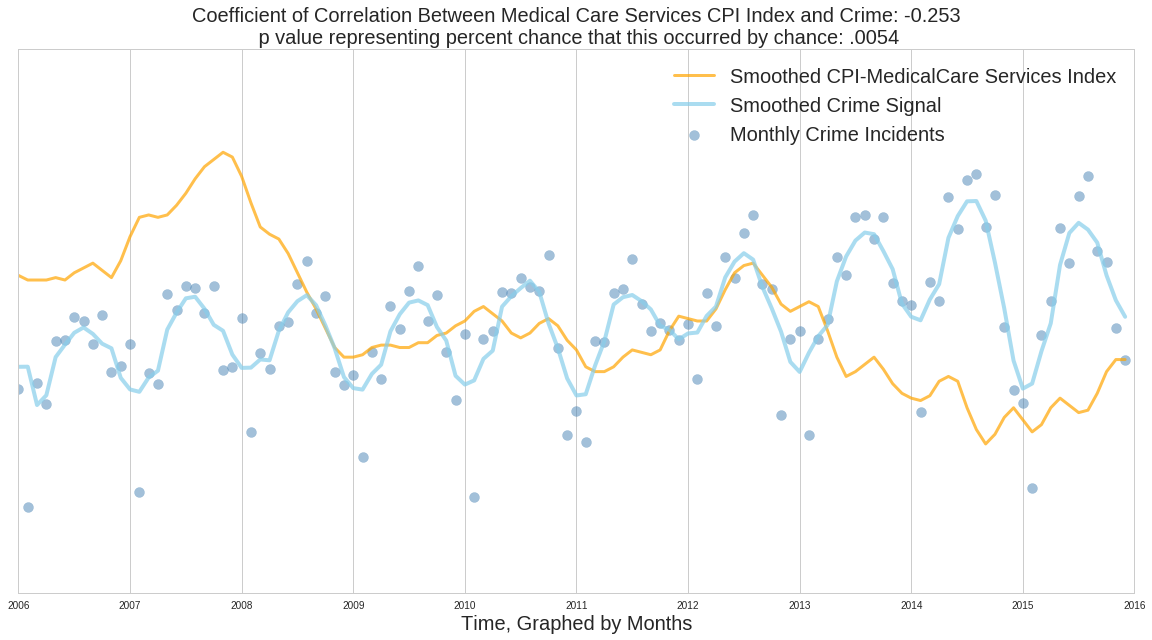

In [23]:
plt.figure(figsize=(20, 10))
plt.plot(X, smooth_cpi, c='orange', linewidth=3, alpha=.7, label = 'Smoothed CPI-MedicalCare Services Index')

plt.scatter(X, m_vals, s=100, alpha=.5, c='steelblue', label = 'Monthly Crime Incidents')

plt.plot(X, m_smooth_avg, c='skyblue', alpha=.7, linewidth=4, label = 'Smoothed Crime Signal')

plt.xlim(xmin=0, xmax=len(m_vals))
plt.ylim(ymin=-4, ymax=4)
plt.xticks(np.arange(0, 121, 12).tolist(), np.arange(2006, 2017).tolist())
plt.yticks([])

coef, p_value = pearsonr(c_vals, m_vals)

plt.xlabel('Time, Graphed by Months', fontsize = 20)
# plt.title('NYC Crime Over Time', fontsize = 30)
plt.title('Coefficient of Correlation Between Medical Care Services CPI Index and Crime: ' + str(np.round(coef, 3)) + 
         '\n p value representing percent chance that this occurred by chance: ' + str(np.array([p_value]))[3:-1],
          fontsize=20)
plt.legend(fontsize = 20, loc=0)

plt.show()

In [12]:
m_vals.min()

-2.7405656413578292

In [13]:
# str(np.array([p_value]))[3:-1]

---

## CPI and Highly Correlated Crime Types

In [14]:
df_kycdMonth = pd.read_csv('kycd_monthly.csv')
df_kycdMonth.columns = ['Month', 'KYCD', 'Count']

In [15]:
df_of = pd.read_csv('kycd_OfnsDesc.csv')
# criminal_kycds = [358, 233]  # Highly correlated to "Medical care commodities"
criminal_kycds = [117, 361, 351, 107, 110, 124] # Highly correlated to "Medical care services"
arr = df_of.sort_values(by='Counts', ascending=False).KY_CD.values
arr

array([341, 578, 344, 351, 109, 235, 361, 105, 107, 106, 126, 110, 359,
       347, 236, 121, 352, 117, 348, 112, 118, 113, 233, 340, 232, 358,
       360, 114, 353, 104, 355, 116, 365, 343, 111, 678, 364, 101, 125,
       343, 238, 231, 124, 350, 126, 675, 345, 342, 572, 363, 346, 356,
       364, 120, 230, 677, 678, 571, 237, 122, 115, 345, 234, 354, 102,
       364, 344, 578, 455, 106, 119, 349, 366, 361, 103, 676, 360, 120,
       672, 685, 460, 359, 881, 233, 357, 235, 351, 341, 109, 356, 236,
       112, 677, 352, 121, 675, 117, 123, 364, 577, 362, 340, 347, 116,
       105, 355, 343, 124, 124, 365, 348, 358, 124, 125, 366, 232, 113,
       237, 111, 350, 107, 230])

In [16]:
DF = df_of[df_of.KY_CD.isin(criminal_kycds)]
DF

,KY_CD,OFNS_DESC,Counts
8,107,NaN,1
9,107,BURGLARY,191406
12,110,GRAND LARCENY OF MOTOR VEHICLE,102061
23,117,NaN,4
24,117,DANGEROUS DRUGS,62679
33,124,NaN,1
34,124,KIDNAPPING,2
35,124,KIDNAPPING & RELATED OFFENSES,2300
36,124,KIDNAPPING AND RELATED OFFENSES,2
76,351,NaN,10


In [17]:
dic1 = {}
for code in arr:
    dic1[code] = smooth(x, normalize(df_kycdMonth[df_kycdMonth.KYCD==code].Count.values), 1)

/home/lee/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/lee/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/lee/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/lee/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/lee/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/lee/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


[[230, nan],
 [881, nan],
 [235, -0.04974919411657576],
 [357, nan],
 [577, nan],
 [103, nan],
 [236, -0.073056004478535913],
 [109, -0.27120098815823412],
 [110, 0.6055474995844613],
 [363, nan],
 [237, nan],
 [359, -0.42399137868690029],
 [676, nan],
 [677, nan],
 [678, -0.47198199428778542],
 [113, 0.16348326471846866],
 [102, nan],
 [685, nan],
 [234, nan],
 [571, nan],
 [572, nan],
 [232, 0.066645487156064429],
 [672, nan],
 [578, -0.43942338536962083],
 [455, nan],
 [362, nan],
 [366, nan],
 [119, nan],
 [460, nan],
 [361, 0.63572119547037753],
 [675, 0.22497713078609119],
 [340, -0.68390184789165842],
 [341, -0.429201995463526],
 [342, nan],
 [343, -0.67405560686186783],
 [344, -0.57715099854292662],
 [345, nan],
 [346, nan],
 [347, 0.09563445933548638],
 [348, -0.65951729630284384],
 [349, nan],
 [350, -0.15621261793031396],
 [351, 0.45811477956757679],
 [352, 0.18881044359240992],
 [353, -0.53461452068949122],
 [354, nan],
 [355, -0.3240486347850931],
 [356, nan],
 [101, nan],

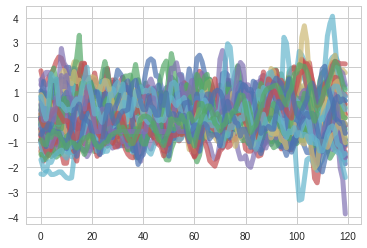

In [18]:
coefs = []
p_values = []

for k, v in dic1.items():
    plt.plot(X, v, alpha=.7, linewidth=5, label = 'Smoothed Signal'+str(k))
    coef, p_value = pearsonr(c_vals, v)
    coefs.append([k, coef])

coefs


In [19]:
dic = {}
for code in criminal_kycds:
    dic[code] = smooth(x, normalize(df_kycdMonth[df_kycdMonth.KYCD==code].Count.values), 1)

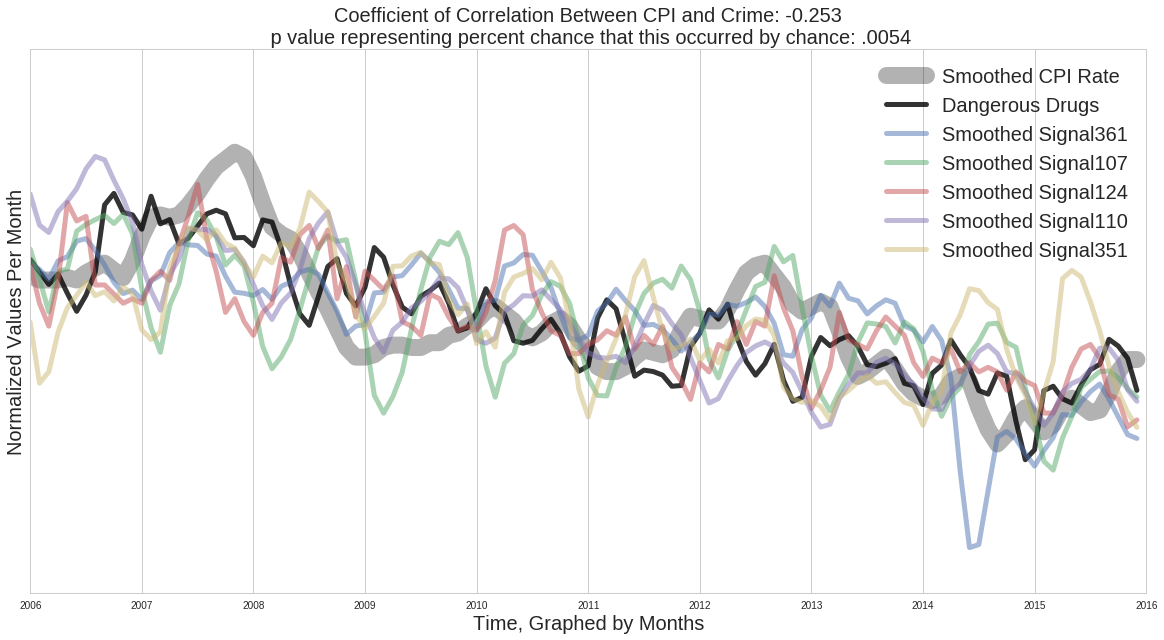

In [20]:
plt.figure(figsize=(20, 10))
plt.plot(X, smooth_cpi, c='black', linewidth=17, alpha=.3, label = 'Smoothed CPI Rate')

# plt.scatter(X, m_vals, s=100, alpha=.5, c='steelblue', label = 'Monthly Crime Incidents')
# plt.plot(X, m_smooth_avg, c='skyblue', alpha=.7, linewidth=4, label = 'Smoothed Crime Signal')

for k, v in dic.items():
    if k==117:
        plt.plot(X, v, 'k', alpha=.8, linewidth=5, label = 'Dangerous Drugs')
    else:
        plt.plot(X, v, alpha=.5, linewidth=5, label = 'Smoothed Signal'+str(k))
    coef, p_value = pearsonr(c_vals, m_vals)
    coefs.append(coef)


plt.xlim(xmin=0, xmax=len(m_vals))
plt.ylim(ymin=-4, ymax=4)
plt.xticks(np.arange(0, 121, 12).tolist(), np.arange(2006, 2017).tolist())
plt.yticks([])

# coef, p_value = pearsonr(c_vals, m_vals)

plt.ylabel('Normalized Values Per Month', fontsize = 20)
plt.xlabel('Time, Graphed by Months', fontsize = 20)
# plt.title('NYC Crime Over Time', fontsize = 30)
plt.title('Coefficient of Correlation Between CPI and Crime: ' + str(np.round(coef, 3)) + 
         '\n p value representing percent chance that this occurred by chance: ' + str(np.array([p_value]))[3:-1],
          fontsize=20)
plt.legend(fontsize = 20, loc=0)

plt.show()

### About Statistical correlations of criminal behaviour

https://en.wikipedia.org/wiki/Statistical_correlations_of_criminal_behaviour